# Unit 6 | Assignment - What's the Weather Like?
----

## WeatherPy

## Background
* Whether financial, political, or social -- data's true power lies in its ability to answer questions definitively. So let's take what you've learned about Python requests, APIs, and JSON traversals to answer a fundamental question: "What's the weather like as we approach the equator?"
Now, we know what you may be thinking: "Duh. It gets hotter..."
But, if pressed, how would you prove it?

* In this example, you'll be creating a Python script to visualize the weather of 500+ cities across the world of varying distance from the equator. To accomplish this, you'll be utilizing a simple Python library, the OpenWeatherMap API, and a little common sense to create a representative model of weather across world cities.
Your objective is to build a series of scatter plots to showcase the following relationships:

    * Temperature (F) vs. Latitude
    * Humidity (%) vs. Latitude
    * Cloudiness (%) vs. Latitude
    * Wind Speed (mph) vs. Latitude

* Your final notebook must:

    * Randomly select at least 500 unique (non-repeat) cities based on latitude and longitude.
    * Perform a weather check on each of the cities using a series of successive API calls.
    * Include a print log of each city as it's being processed with the city number and city name.
    * Save both a CSV of all data retrieved and png images for each scatter plot.

## Observable trends based on the data
----

* From my random city sampling of 547 cities across the world, my City Latitude vs Max Temperature plot does show us that the temperature obviously does increase as we approach the equator from the south. However, we see the highest gathering of temperatures around the Tropic of Cancer, which sits at a latitude of 23.5 degrees North. 


* In looking at the Humidity and Cloudiness visuals, there really isn't a very strong correlation along latitude. I ran the random sampling twice and generally had the same read on both occasions.


* Lastly, as we look at the Wind Speed plot, we do see wind speed increase slightly as we move away North from the Equator. We see a more dense area of plots from the Equator through the Tropic of Cancer (23.5 N) and beyond to the Arctic Circle (66.5 N) versus what we see from the Antarctic Circle (66.5 S) up through the Tropic of Capricorn (23.5 S) up to the Equator.




In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy


# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [51]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [52]:
# need to display proper weather units
units = "imperial"

# define url
url = f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q="
#url

In [53]:
# Create the empty lists to store the data in the DF
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# set initial count quantities for organization
record = 1

# Initial print for start of DR
print(f"Beginning of Data Retrieval")
print(f"-------------------------------")

# loops thru cities and create dataframe data
for city in cities:
    try:
        response = requests.get(url + city).json()
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter by one 
        record= record + 1
        
        # Wait a second in the call loop so API doesn't lock me out
        time.sleep(1.01)
        
    # If no record found then skip it and move on
    except:
        print("City not found. Skipping...")
    continue
        
        
        
       

Beginning of Data Retrieval
-------------------------------
Processing Record 1 | Leningradskiy
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=leningradskiy
Processing Record 2 | Kendari
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=kendari
Processing Record 3 | Arraial do Cabo
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=arraial do cabo
Processing Record 4 | Alyangula
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=alyangula
Processing Record 5 | Lakes Entrance
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=lakes entrance
Processing Record 6 | Jamestown
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=jamestown
Processing Record 7 | Neuq

City not found. Skipping...
Processing Record 56 | Mar del Plata
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=mar del plata
Processing Record 57 | Bredasdorp
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=bredasdorp
Processing Record 58 | Carnarvon
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=carnarvon
Processing Record 59 | Lebu
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=lebu
Processing Record 60 | Avarua
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=avarua
Processing Record 61 | Dingle
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=dingle
Processing Record 62 | Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?appid=fb48

Processing Record 110 | Pailon
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=pailon
Processing Record 111 | Mount Isa
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=mount isa
Processing Record 112 | Marsh Harbour
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=marsh harbour
Processing Record 113 | Chuy
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=chuy
Processing Record 114 | Bontang
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=bontang
Processing Record 115 | Clyde River
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=clyde river
Processing Record 116 | Yinchuan
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe1450973

Processing Record 165 | Robertsport
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=robertsport
Processing Record 166 | Tuatapere
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=tuatapere
Processing Record 167 | Victoria
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=victoria
Processing Record 168 | Port Alfred
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=port alfred
Processing Record 169 | Cabo San Lucas
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=cabo san lucas
Processing Record 170 | Egvekinot
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=egvekinot
Processing Record 171 | Muscat
http://api.openweathermap.org/data/2.5/weather?appid=

Processing Record 220 | Qidong
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=qidong
Processing Record 221 | Manakara
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=manakara
Processing Record 222 | Nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=nouadhibou
Processing Record 223 | Baykit
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=baykit
Processing Record 224 | Naze
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=naze
Processing Record 225 | Zudilovo
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=zudilovo
Processing Record 226 | Ribeira Grande
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba

Processing Record 274 | Bathsheba
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=bathsheba
City not found. Skipping...
Processing Record 275 | Airai
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=airai
Processing Record 276 | Maniitsoq
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=maniitsoq
Processing Record 277 | Portland
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=portland
Processing Record 278 | Georgetown
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=georgetown
Processing Record 279 | Ancud
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=ancud
Processing Record 280 | Ahipara
http://api.openweathermap.org/data/2.5/weather?appid=fb4

Processing Record 329 | Dargaville
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=dargaville
Processing Record 330 | Outjo
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=outjo
City not found. Skipping...
Processing Record 331 | Lar
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=lar
City not found. Skipping...
Processing Record 332 | Te Anau
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=te anau
Processing Record 333 | Puerto Baquerizo Moreno
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=puerto baquerizo moreno
Processing Record 334 | Kenai
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=kenai
Processing Record 335 | Yabassi
http://api.ope

Processing Record 383 | Vao
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=vao
City not found. Skipping...
City not found. Skipping...
Processing Record 384 | Presidente Medici
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=presidente medici
Processing Record 385 | Torbay
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=torbay
Processing Record 386 | Grand Forks
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=grand forks
Processing Record 387 | Yumen
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=yumen
Processing Record 388 | Tecpan
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=tecpan
Processing Record 389 | Yulara
http://api.openweathermap

Processing Record 438 | Harper
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=harper
Processing Record 439 | Broome
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=broome
Processing Record 440 | Jemnice
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=jemnice
Processing Record 441 | Tangshan
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=tangshan
Processing Record 442 | Kavieng
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=kavieng
Processing Record 443 | Kon Tum
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=kon tum
Processing Record 444 | Ostrovnoy
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=

Processing Record 492 | Namatanai
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=namatanai
Processing Record 493 | Valer
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=valer
Processing Record 494 | Dakar
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=dakar
Processing Record 495 | Kulachi
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=kulachi
Processing Record 496 | Picota
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=picota
Processing Record 497 | Caala
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=caala
Processing Record 498 | Shagonar
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&

Processing Record 546 | Polewali
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=polewali
Processing Record 547 | San Jose
http://api.openweathermap.org/data/2.5/weather?appid=fb488b8203c4cbe14509735b7b56a2ba&units=imperial&q=&q=san jose


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [56]:
# Create a dictonary with the lists generated from the looping above
random_city_dict = {
    "City":city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity":humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp":max_temp,
    "Wind Speed":wind_speed
}

# Create a dataframe from the dictionary created
city_weather_df = pd.DataFrame(random_city_dict)

# count the data values 
city_weather_df.count()

City          547
Cloudiness    547
Country       547
Date          547
Humidity      547
Lat           547
Lng           547
Max Temp      547
Wind Speed    547
dtype: int64

In [57]:
# save to csv
city_weather_df.to_csv("city_weather_df.csv")

# run head to check out DF
city_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Leningradskiy,5,RU,1562800668,68,69.38,178.42,43.91,5.99
1,Kendari,97,ID,1562800669,88,-3.99,122.52,74.15,2.37
2,Arraial do Cabo,0,BR,1562800670,77,-22.97,-42.02,66.20,8.05
3,Alyangula,30,AU,1562800671,100,-13.85,136.42,66.20,8.05
4,Lakes Entrance,62,AU,1562800673,56,-37.88,147.99,53.01,4.00


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

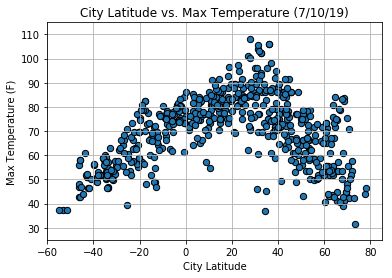

In [106]:
# Build scatter plot Temperature (F) vs. Latitude
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], marker="o", edgecolors="black", s=40)

# graph titles and properties
plt.title("City Latitude vs. Max Temperature (7/10/19)")
plt.ylabel("Max Temperature (F)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(25, 115)

# Save png
plt.savefig("Max Temp vs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

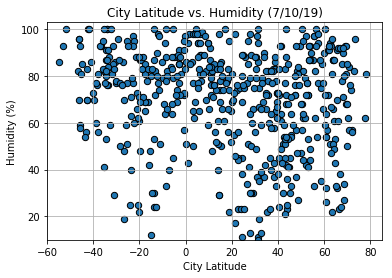

In [107]:
# Build scatter plot Humidity (%) vs. Latitude
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], marker="o", edgecolors="black", s=40)

# graph titles and properties
plt.title("City Latitude vs. Humidity (7/10/19)")
plt.ylabel("Humidity (%)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(10, 103)

# Save png
plt.savefig("Humidity vs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

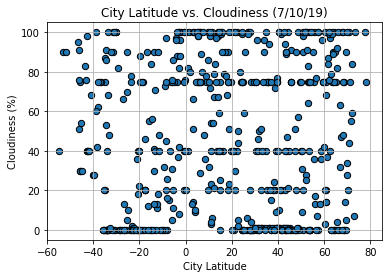

In [108]:
# Build scatter plot Cloudiness (%) vs. Latitude
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], marker="o", edgecolors="black", s=40)

# graph titles and properties
plt.title("City Latitude vs. Cloudiness (7/10/19)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(-5, 105)

# Save png
plt.savefig("Cloudiness vs Latitude.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

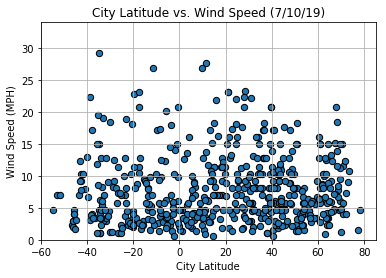

In [109]:
# Build scatter plot Wind Speed (mph) vs. Latitude
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], marker="o", edgecolors="black", s=40)

# graph titles and properties
plt.title("City Latitude vs. Wind Speed (7/10/19)")
plt.ylabel("Wind Speed (MPH)")
plt.xlabel("City Latitude")
plt.grid(True)
plt.xlim(-60, 85)
plt.ylim(0, 34)

# Save png
plt.savefig("Wind Speed vs Latitude.png")

# Show plot
plt.show()